In [30]:
import numpy as np 
import pandas as pd 


import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))



In [31]:
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import seaborn as sns

In [32]:
train=pd.read_csv('train.csv')
test=pd.read_csv('test.csv')

In [33]:
train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [34]:
test.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [35]:
train.isnull().sum().sum()

0

In [36]:
test.isnull().sum().sum()

0

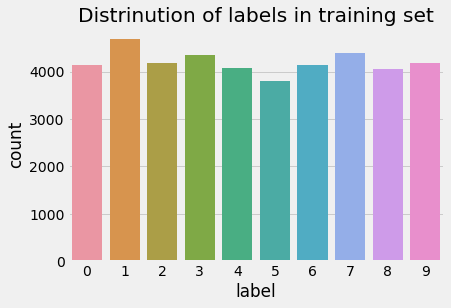

In [37]:
sns.countplot(x='label',data=train)
plt.title('Distrinution of labels in training set')
plt.show()

In [38]:
X=train.drop('label',axis=1)

In [39]:
y=train['label']
y=pd.get_dummies(y)

In [40]:
from sklearn.model_selection import train_test_split

In [41]:
X_train,X_valid,y_train,y_valid = train_test_split(X,y,train_size=0.9,test_size=0.1,random_state=0)

In [42]:
from tensorflow import keras
from tensorflow.keras import layers

In [43]:
model=keras.Sequential([
    
    #hidden layer 1
    layers.Dense(units=256, activation='relu', input_shape=[784]),
    
    #output layer
    layers.Dense(units=10 , activation='softmax')
])

model.compile(optimizer='adam',
             loss='categorical_crossentropy',
             metrics=['categorical_accuracy'])


In [44]:
train_model=model.fit(
            X_train,y_train,
            validation_data=(X_valid,y_valid),
            batch_size=500,
            epochs=10,
            verbose=True
)

Epoch 1/10
76/76 [==============================] - 7s 41ms/step - loss: 11.0327 - categorical_accuracy: 0.8301 - val_loss: 3.3995 - val_categorical_accuracy: 0.9090
Epoch 2/10
76/76 [==============================] - 2s 23ms/step - loss: 2.0556 - categorical_accuracy: 0.9249 - val_loss: 2.2300 - val_categorical_accuracy: 0.9267
Epoch 3/10
76/76 [==============================] - 2s 24ms/step - loss: 1.1121 - categorical_accuracy: 0.9450 - val_loss: 1.7304 - val_categorical_accuracy: 0.9333
Epoch 4/10
76/76 [==============================] - 2s 26ms/step - loss: 0.6680 - categorical_accuracy: 0.9610 - val_loss: 1.5044 - val_categorical_accuracy: 0.9400
Epoch 5/10
76/76 [==============================] - 2s 25ms/step - loss: 0.4341 - categorical_accuracy: 0.9693 - val_loss: 1.3898 - val_categorical_accuracy: 0.9421
Epoch 6/10
76/76 [==============================] - 2s 25ms/step - loss: 0.2870 - categorical_accuracy: 0.9762 - val_loss: 1.4222 - val_categorical_accuracy: 0.9410
Epoch 7/1

In [45]:
predic=model.predict(test)

In [46]:
predic_classes=np.argmax(predic,axis=1)

In [47]:
output=pd.DataFrame({'ImageId':test.index+1,'Label':predic_classes})

In [48]:
output.head()

,ImageId,Label
0,1,2
1,2,0
2,3,9
3,4,2
4,5,3


In [49]:
output.to_csv('submission.csv', index=False)